In [1]:
# Character Match-up percentages
import smasharchive, smashplots

char1 = 'kirby'
char2 = 'pika'
rating_threshold = 10.0
silent_flag = True

db = smasharchive.smashdb()
db.tournament_name_skip['kansai'] = 0
db.refilter_archive()
db.refilter_archive_for_ssbcentral(threshold=10)
total_number_games = len(db.print_char_mu( set( [char1, char2] ), silent=True ))

db = smasharchive.smashdb()
db.tournament_name_skip['kansai'] = 0
db.refilter_archive()
db.refilter_archive_for_ssbcentral(threshold=rating_threshold)

print("")
data_matrix = db.print_char_mu( set( [char1, char2] ), silent=silent_flag )

print("")
print("Games used: {}".format(len(data_matrix)))
print("Out of total: {}".format(total_number_games))
print("Num players: ", len(db.player_rankings))

import collections
import numpy
data_matrix = numpy.array(data_matrix)
winchars = collections.Counter( [ x for x in data_matrix[:, 5] ] )
#print(winchars)

initiatlizing smashdb
initiatlizing smashdb


Games used: 116
Out of total: 116
Num players:  68


In [2]:
import matplotlib.pyplot as plt

print(data_matrix[0,:])

winner_ratings = [ float(x) for x in data_matrix[:, 7] ]
loser_ratings = [ float(x) for x in data_matrix[:, 8] ]

# indices when char1 wins; when char 2 wins
temp_winnerlist = data_matrix[:,5]
char1_indices = [ idx for idx, char in enumerate(temp_winnerlist) if char == char1]
char2_indices = [ idx for idx, char in enumerate(temp_winnerlist) if char == char2]

['genesis 3' '2016' 'top16' 'superboomfan' 'tacos' 'kirby' 'pika' '9.92'
 '8.88']


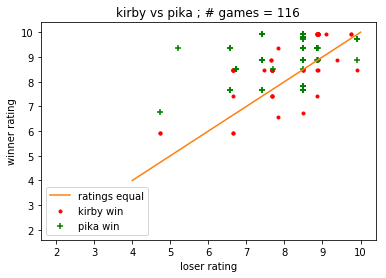

In [3]:
plt.cla()
plt.clf()
plt.scatter( [loser_ratings[j] for j in char1_indices], [ winner_ratings[j] for j in char1_indices], marker='.', color='red', label=char1 +' win')
plt.scatter( [loser_ratings[j] for j in char2_indices], [ winner_ratings[j] for j in char2_indices], marker='+', color='green', label=char2 + ' win')
plt.plot( [2], [2])
plt.plot( [4,10], [4,10], label='ratings equal' )
plt.title("{} vs {} ; # games = {}".format(char1, char2, len(winner_ratings)))
plt.ylabel("winner rating")
plt.xlabel("loser rating")
plt.legend(loc='lower left')
plt.show()

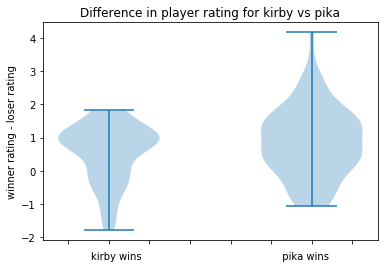

In [4]:
char1_win_rating_diffs = [ (winner_ratings[idx] - loser_ratings[idx]) for idx in char1_indices ]
char2_win_rating_diffs = [ (winner_ratings[idx] - loser_ratings[idx]) for idx in char2_indices ]

    
plt.clf()
plt.cla()
plt.violinplot( [char1_win_rating_diffs, char2_win_rating_diffs])#, labels = [char1 + ' wins', char2 + ' wins'] )
plt.title("Difference in player rating for {} vs {}".format(char1, char2))
plt.ylabel("winner rating - loser rating")
plt.gca().set_xticklabels([])

plt.xlabel("{:<30}              {:>20}".format(char1 + ' wins', char2 + ' wins'))

plt.show()

In [5]:
import collections

plt.cla()
plt.clf()

plt.hist(char1_win_rating_diffs, alpha=0.5, label='{} wins; {}'.format(char1, len(char1_win_rating_diffs)))
plt.hist(char2_win_rating_diffs, alpha=0.5, label='{} wins; {}'.format(char2, len(char2_win_rating_diffs)))
plt.legend(loc='upper left')
plt.title("Games between ssbcentral-rated players")
plt.ylabel("Number of wins")
plt.xlabel("Difference between winner rating and loser rating")
#plt.show()
plt.rcParams["figure.figsize"] = [2.5,3.5]
plt.savefig('rated-mu-analysis-{}-{}.png'.format(char1, char2), dpi=200)

Current size: [2.5, 3.5]


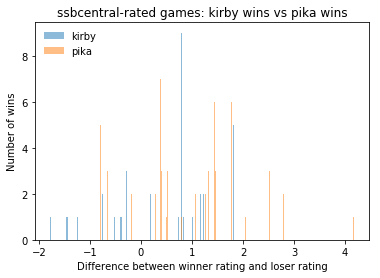

In [6]:
import collections

plt.cla()
plt.clf()

char1rates, char1counts = zip(*[ (x,y) for x,y in collections.Counter(char1_win_rating_diffs).items() ])
char2rates, char2counts = zip(*[ (x,y) for x,y in collections.Counter(char2_win_rating_diffs).items() ])

plt.bar(char1rates, char1counts, alpha=0.5, width=0.015, label=char1)# label='{} wins; {}'.format(char1, len(char1_win_rating_diffs)))
plt.bar(char2rates, char2counts, alpha=0.5, width=0.015, label=char2)#
plt.legend(loc='upper left', frameon=False)
plt.title("ssbcentral-rated games: {} vs {}".format(char1+ ' wins', char2+' wins'))
plt.ylabel("Number of wins")
plt.xlabel("Difference between winner rating and loser rating")

# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print("Current size: {}".format(fig_size))
 
# Set figure width to 12 and height to 9
fig_size[0] = 8
fig_size[1] = 3
plt.rcParams["figure.figsize"] = fig_size

plt.show()
